In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
sns.set_style(style='darkgrid')#配置样式
sns.set_context(context='notebook',font_scale=1)#配置字体
sns.set_palette(sns.color_palette('RdBu',n_colors=8))#配置色板

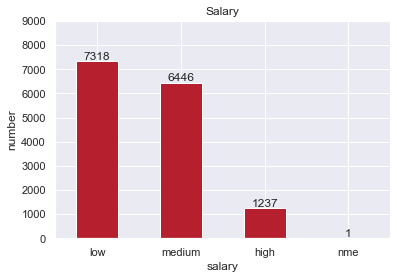

In [4]:
#Salary柱状图
length = len(df['salary'].value_counts())
plt.title('Salary')
plt.bar(np.arange(length)+0.5,df['salary'].value_counts(),width=0.5)
plt.xticks(np.arange(length)+0.5,df['salary'].value_counts().index)
plt.axis([0,4,0,9000])
plt.xlabel('salary')
plt.ylabel('number')
for x,y in zip(np.arange(length)+0.5,df['salary'].value_counts()):
    plt.text(x,y,y,ha='center',va='bottom')

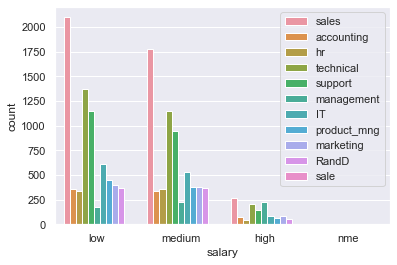

In [5]:
sns.countplot(x='salary',hue='department',data=df)
plt.legend(loc='upper right')

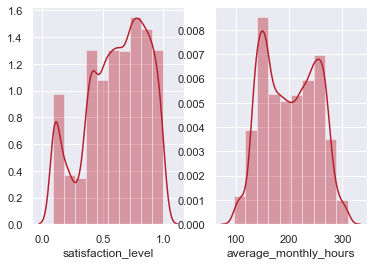

In [6]:
#分布分析图
f = plt.figure(0)
f.add_subplot(1,2,1)
sns.distplot(df['satisfaction_level'],bins=10)
f.add_subplot(1,2,2)
sns.distplot(df['average_monthly_hours'],bins=10)

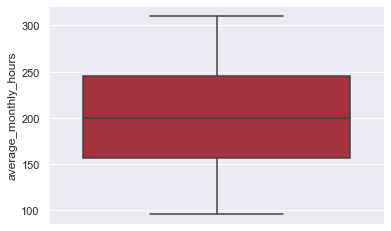

In [7]:
#箱线图
sns.boxplot(y=df['average_monthly_hours'],saturation=0.75)

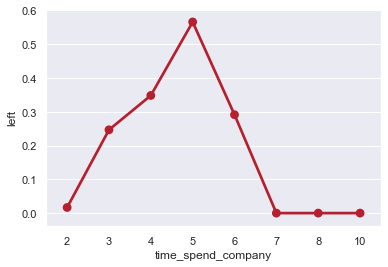

In [8]:
#折线图
sub_df = df.groupby('time_spend_company').mean()
sns.pointplot(sub_df.index,sub_df['left'])

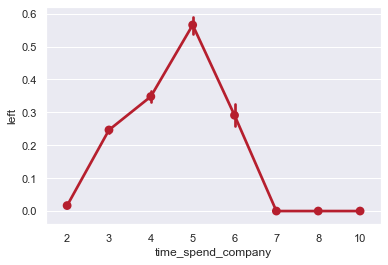

In [9]:
sns.pointplot(x='time_spend_company',y='left',data=df)

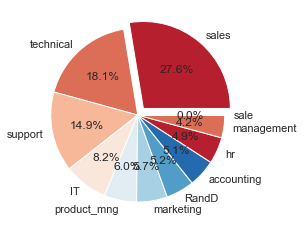

In [12]:
#饼图
lbs = df['department'].value_counts().index
explodes = [0.1 if i=='sales' else 0 for i in lbs]
plt.pie(df['department'].value_counts(normalize=True),explode=explodes,
        autopct='%1.1f%%',labels=df['department'].value_counts().index)
plt.show()